In [132]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [133]:
conn = pymysql.connect(host='localhost',db='kiva',user='ajy0714',password='dkswnsdud@3767',charset='utf8')
cursor = conn.cursor()

# 연/월별 펀딩 수

In [134]:
sql = 'SELECT postedDate FROM loans2 ORDER BY postedDate ASC'
cursor.execute(sql)
result = cursor.fetchall()

In [135]:
temp=[]
for data in result:
    temp.append(data[0][0:7])

In [136]:
w_count = {}
for lst in temp:
    try: w_count[lst] += 1
    except: w_count[lst]=1
del w_count['']

In [137]:
w_count_keys=list(w_count.keys())
w_count_values=list(w_count.values())
print(sum(w_count_values))

2060987


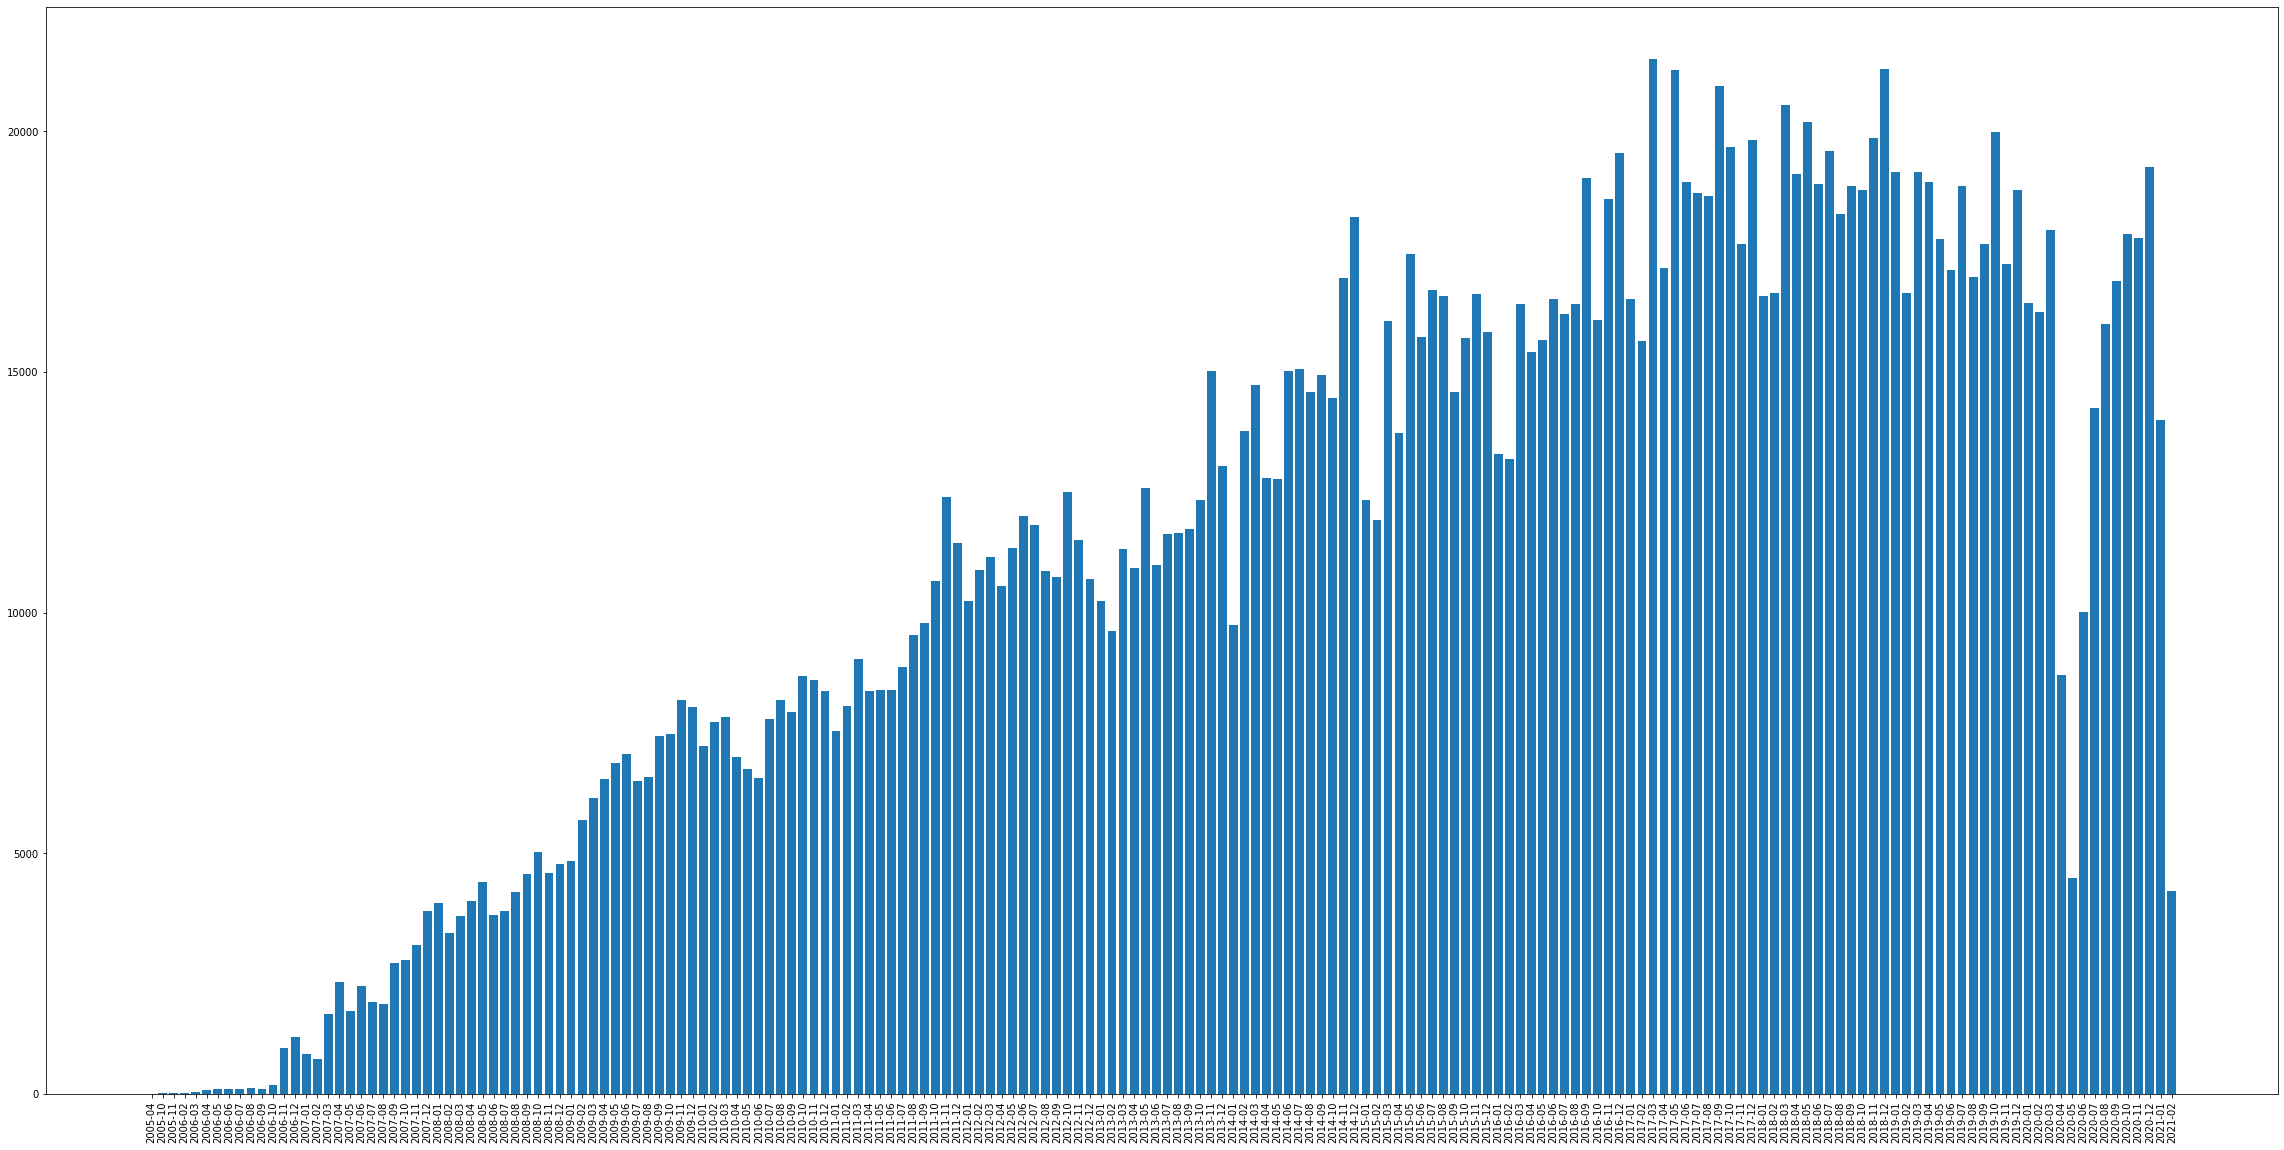

In [138]:
plt.figure(figsize=(40,20))
plt.bar(w_count_keys, w_count_values)
plt.xticks(rotation=90)
plt.show()

# 국가별 펀딩 수

In [ ]:
sql = 'SELECT id, location_Country, postedDate, activity, sector FROM loans2 ORDER BY postedDate ASC'
cursor.execute(sql)
result = cursor.fetchall()

In [ ]:
temp=[]
for data in result:
    temp.append(data[1])

In [ ]:
w_count = {}
for lst in temp:
    try: w_count[lst] += 1
    except: w_count[lst]=1

In [ ]:
w_count_keys=list(w_count.keys())
w_count_values=list(w_count.values())

In [ ]:
dictionary = dict(zip(w_count_keys,w_count_values))
dictionary = dict(sorted(dictionary.items(), key=operator.itemgetter(1)))
w_count_keys=list(dictionary.keys())
w_count_values=list(dictionary.values())

In [ ]:
fig, ax = plt.subplots(figsize=(40,80))    
width = 0.5
ind = np.arange(len(w_count_values))  # the x locations for the groups
ax.barh(ind, w_count_values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(w_count_keys,fontsize='20',minor=False)

for i, v in enumerate(w_count_values):
    ax.text(v + 5, i, str(v), color='green', fontweight='bold', fontsize='30')
    
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()
#plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

#  국가별 펀딩 수 변화

In [16]:
sql = 'SELECT DISTINCT location_country FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [17]:
list2=[]

for sector in result:
    sql = 'SELECT location_country, postedDate FROM loans2 WHERE location_country='+"'"+sector[0]+"' AND postedDate!='' ORDER BY location_country desc, postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);

In [18]:
def each_country_plot(Country2_keys,Country2_values,lbl):
    plt.figure(figsize=(60,20))
    plt.plot(Country2_keys, Country2_values, label=lbl, color='black')
    plt.legend(loc='upper left', fontsize=25)
    plt.xticks(rotation=45)
    plt.show()

In [19]:
def country_count(i):
    Country1 = []
    for i in list2[i]:
        Country1.append(i[1][0:7])

    Country2 = {}
    for lst in Country1:
        try: Country2[lst] += 1
        except: Country2[lst]=1
            
    return Country2

#### Philippines

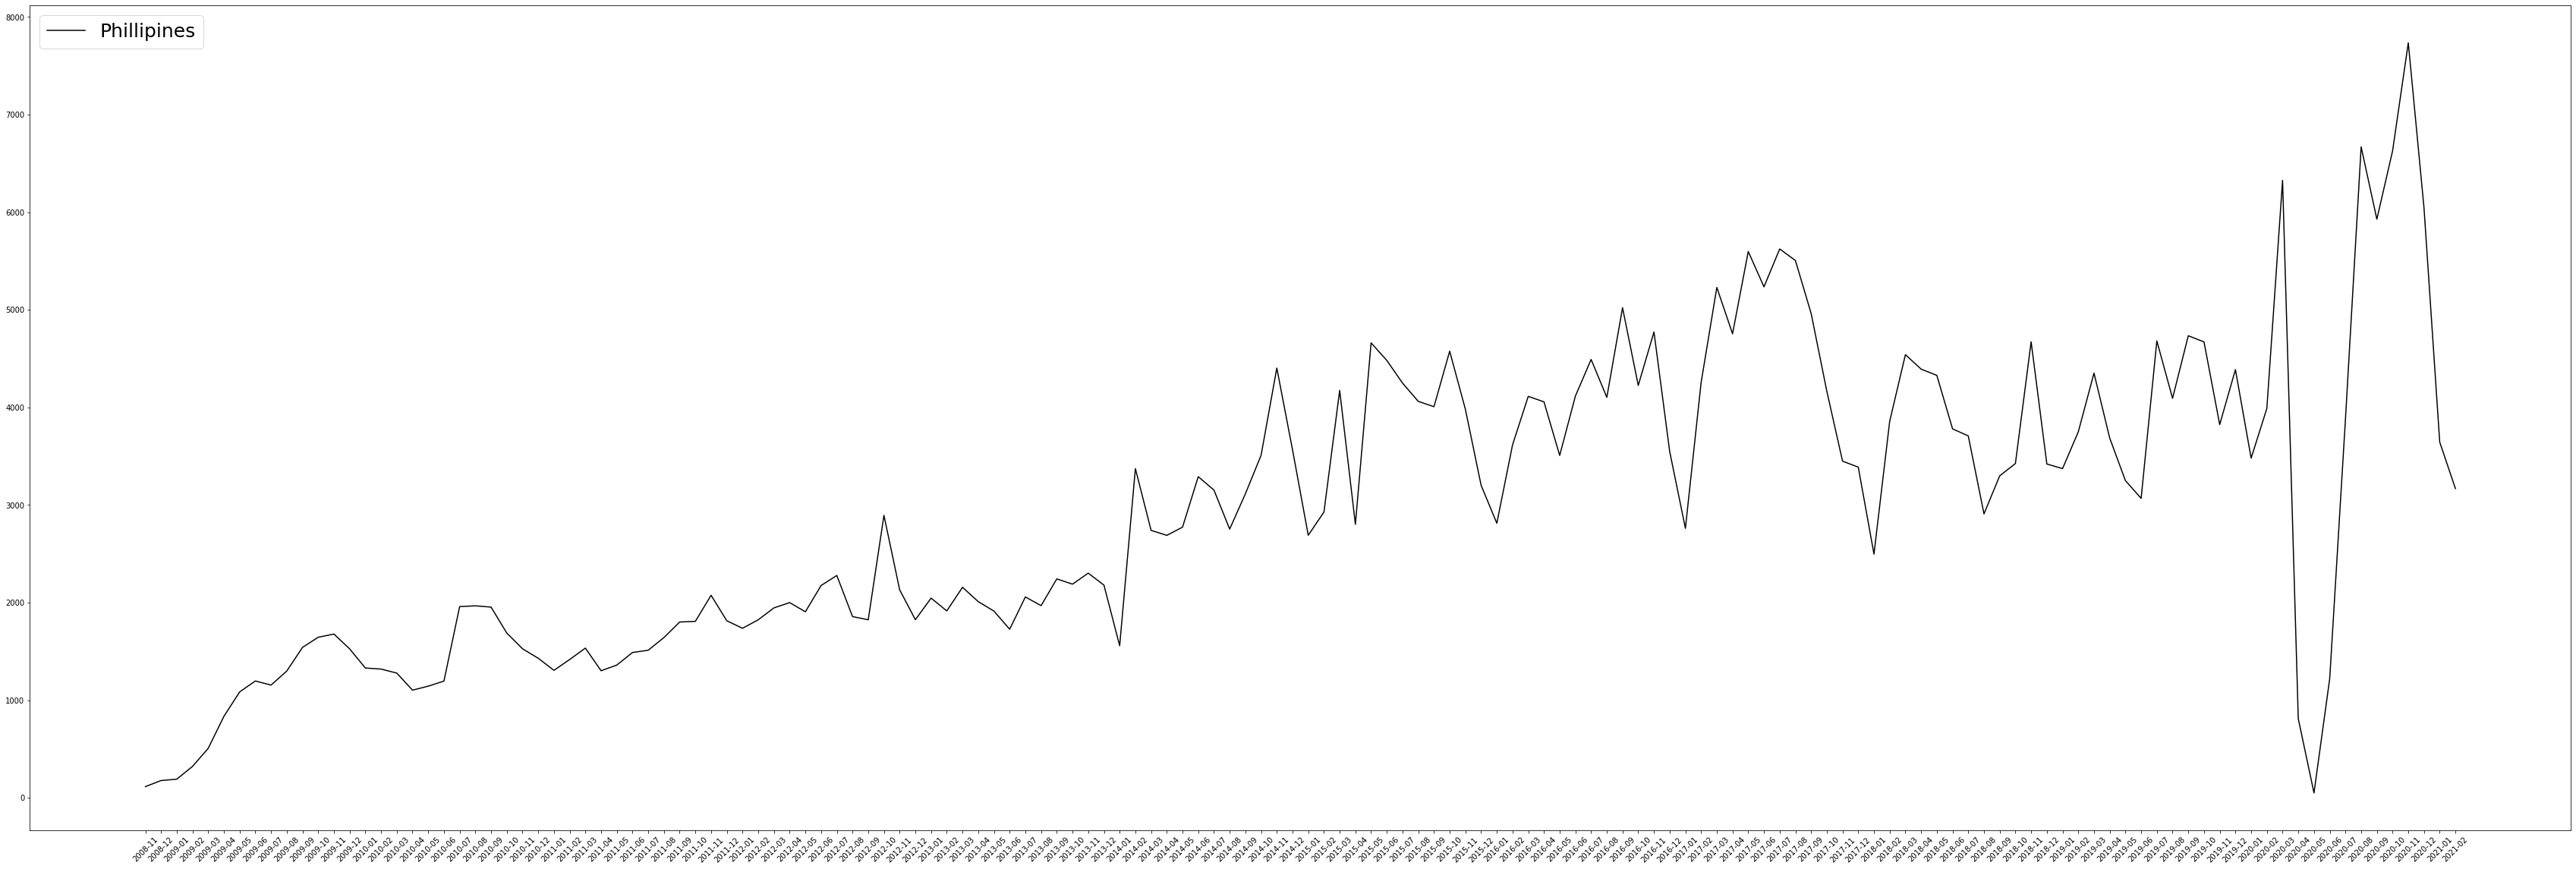

In [20]:
Country_info=country_count(48)
each_country_plot(list(Country_info.keys()),list(Country_info.values()),'Phillipines')

#### Kenya

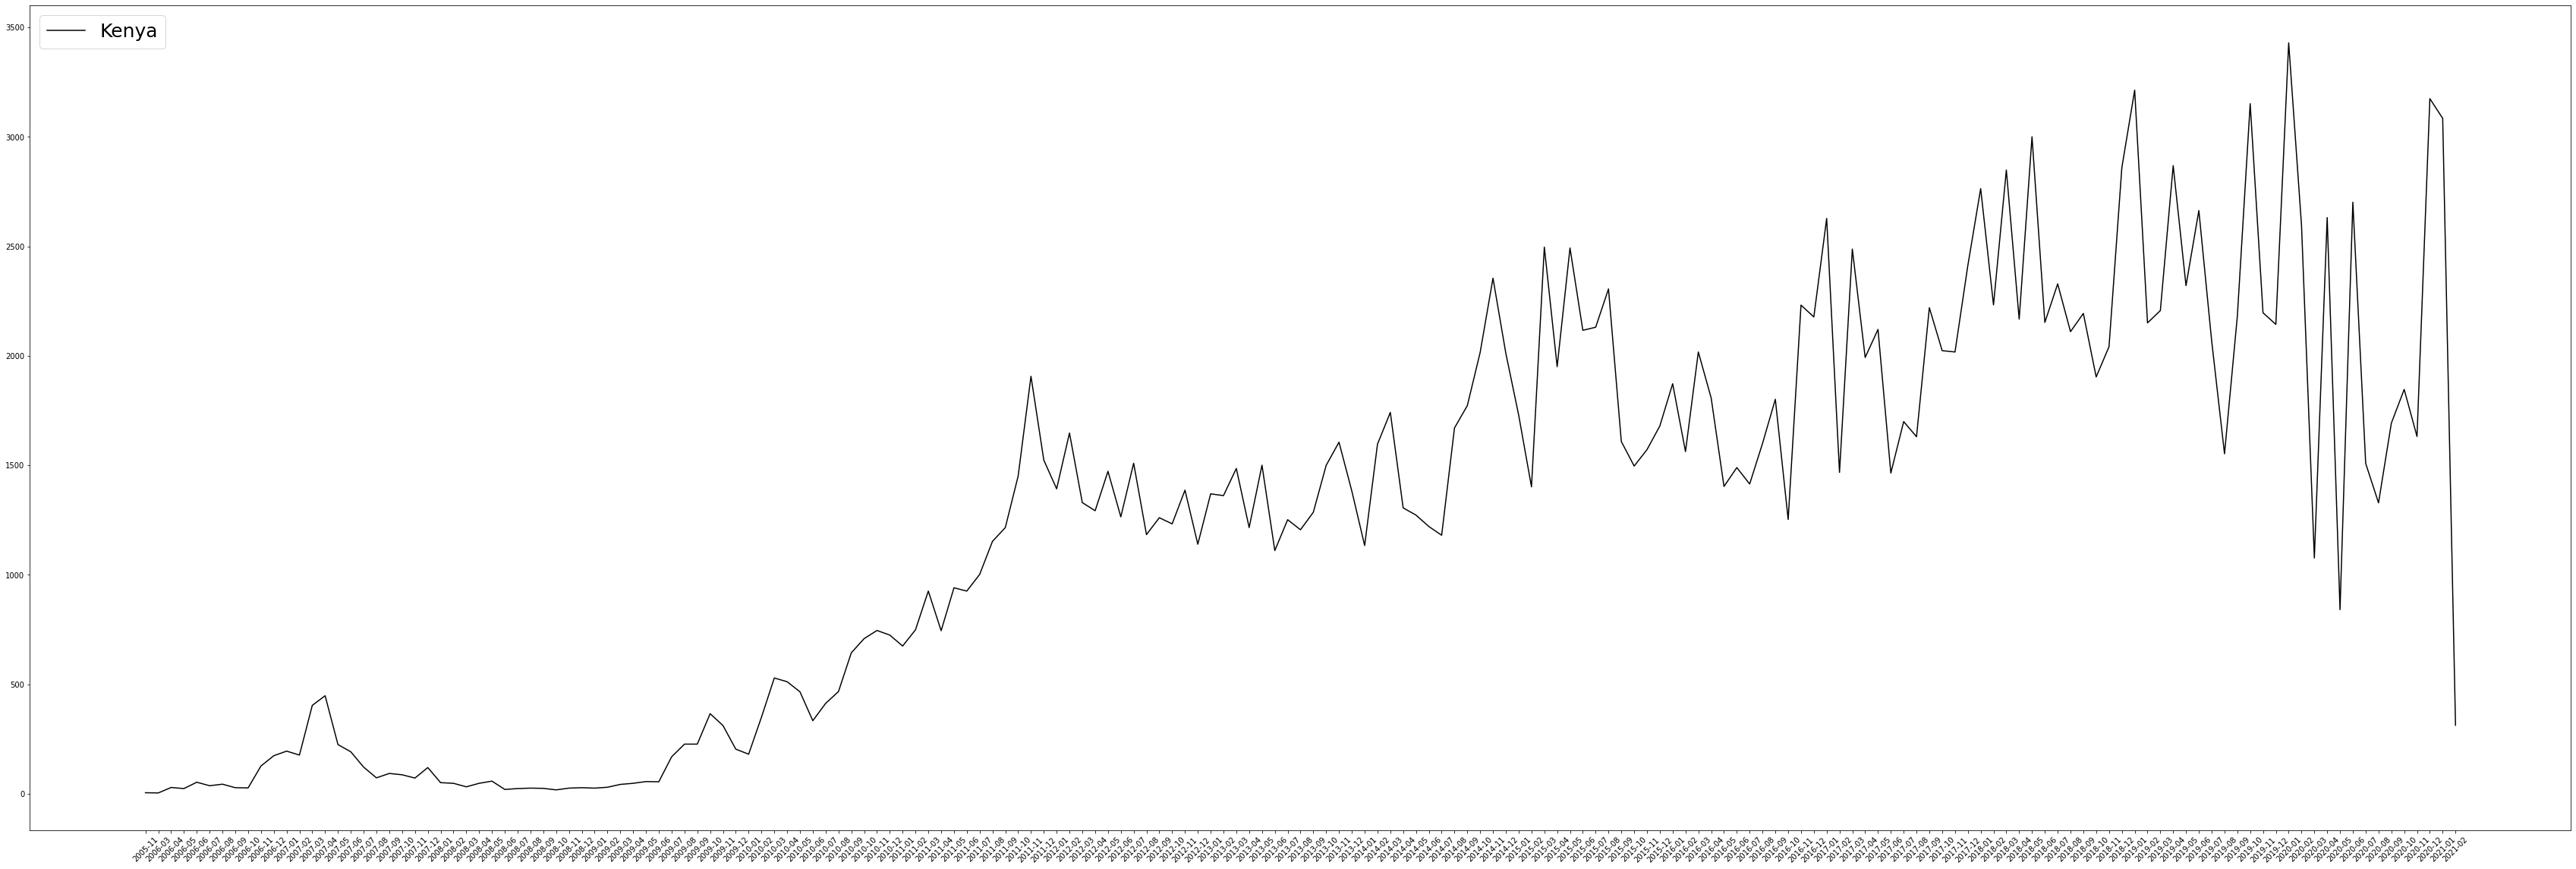

In [21]:
Country_info=country_count(2)
each_country_plot(list(Country_info.keys()),list(Country_info.values()),'Kenya')

#### Cambodia

In [ ]:
Country_info=country_count(9)
each_country_plot(list(Country_info.keys()),list(Country_info.values()),'Cambodia')

#### Peru

In [ ]:
Country_info=country_count(37)
each_country_plot(list(Country_info.keys()),list(Country_info.values()),'Peru')

# 섹터, 년도별 펀딩 수 변화

In [139]:
sql = 'SELECT DISTINCT sector FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [140]:
list2=[]

for sector in result:
    sql = 'SELECT sector, postedDate FROM loans2 WHERE sector='+"'"+sector[0]+"' AND postedDate!='' ORDER BY sector desc, postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);

In [141]:
def category(i):
    category = []

    for j in list2[i]:
        category.append(j[1][0:7])

    category2 = {}
    for lst in category:
        try: category2[lst] += 1
        except: category2[lst]=1

    category2_keys=list(category2.keys())
    category2_values=list(category2.values())
    
    return category2_keys, category2_values

In [142]:
Food_keys, Food_values = category(0)
Agriculture_keys, Agriculture_values = category(1)
Clothing_keys, Clothing_values = category(2)
Construction_keys, Construction_values = category(3)
Health_keys, Health_values = category(4)
Services_keys, Services_values = category(5)
Retail_keys, Retail_values = category(6)
Arts_keys, Arts_values = category(7)
Housing_keys, Housing_values = category(8)
Transportation_keys, Transportation_values = category(9)
Manufacturing_keys, Manufacturing_values = category(10)
Entertainment_keys, Entertainment_values = category(11)
Wholesale_keys, Wholesale_values = category(12)
Education_keys, Education_values = category(13)
Personal_Use_keys, Personal_Use_values = category(14)

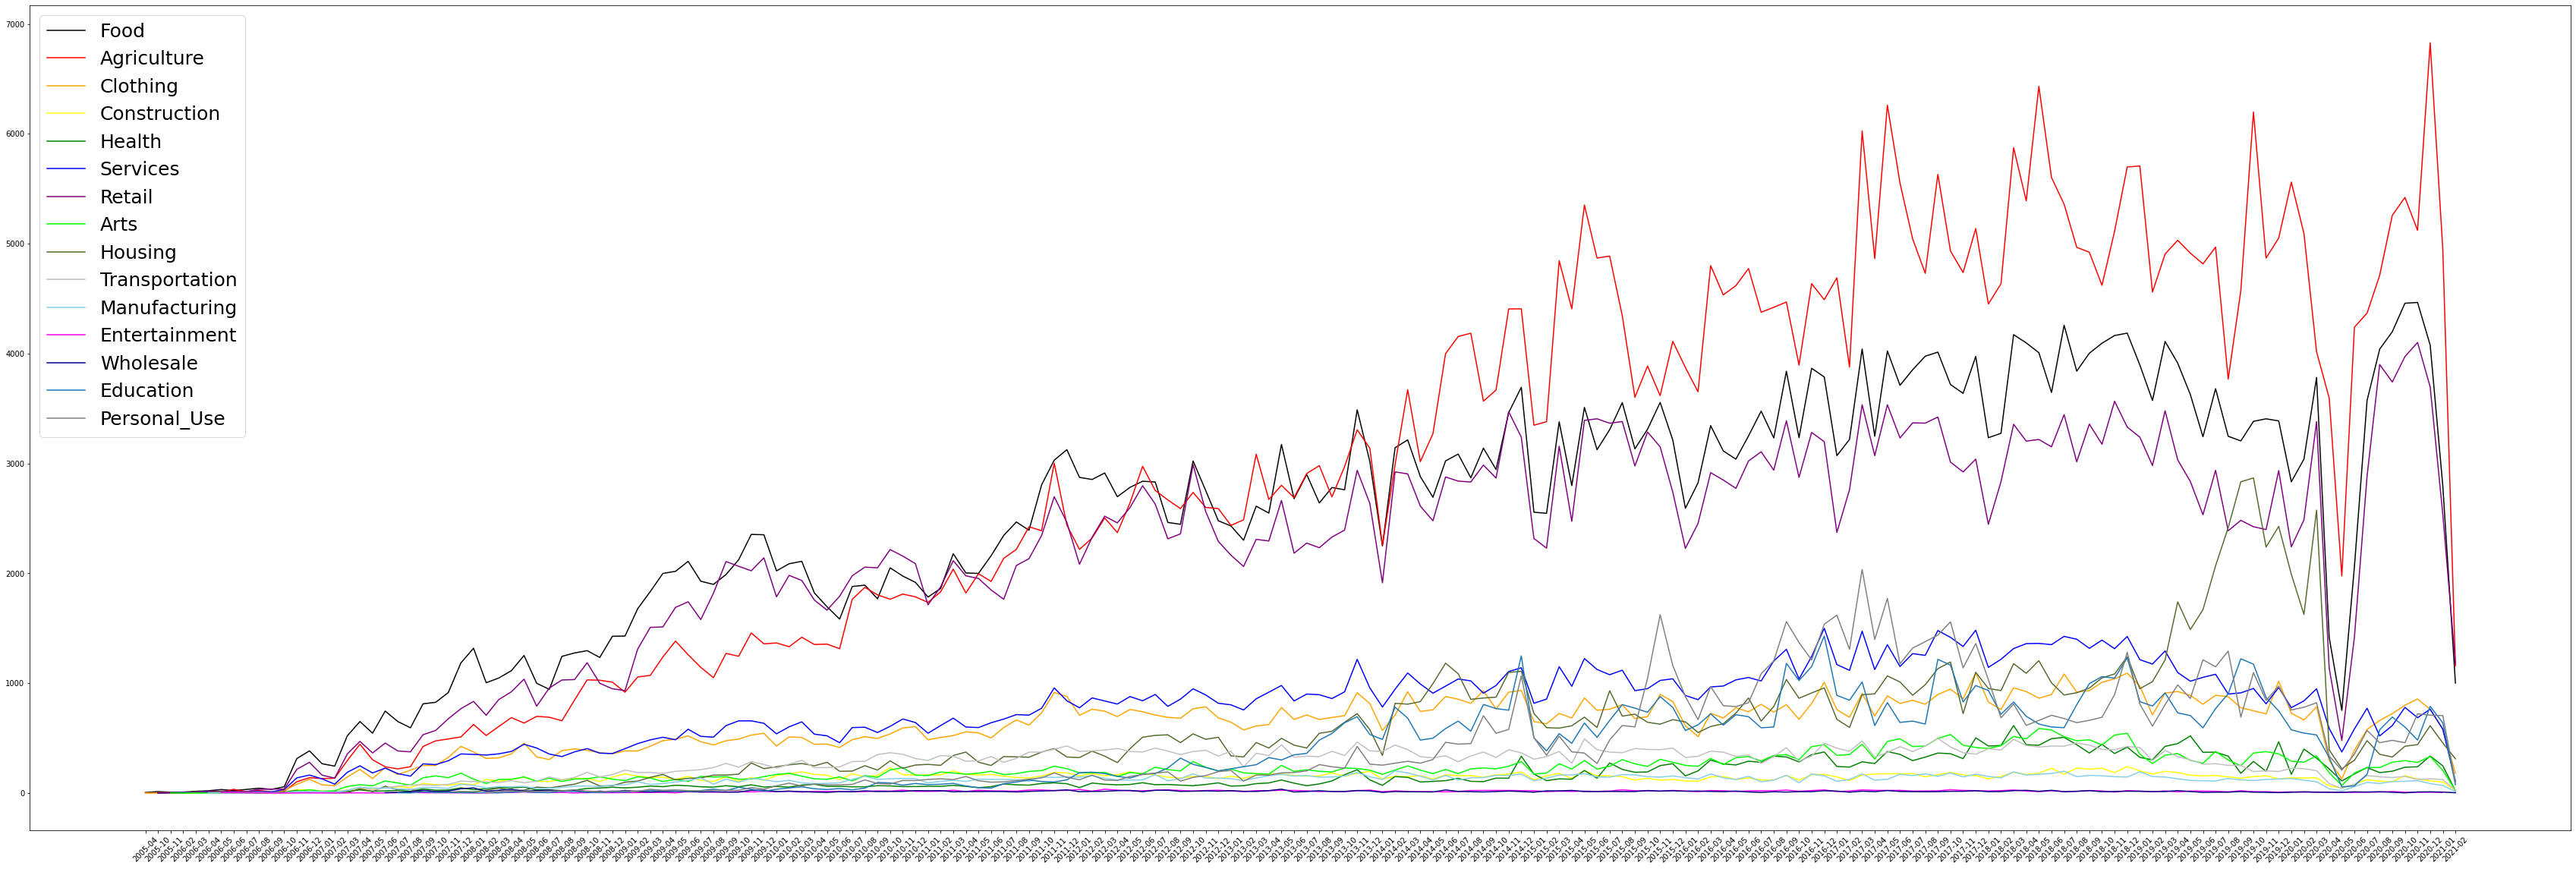

In [143]:
plt.figure(figsize=(60,20))
plt.plot(Food_keys, Food_values, label='Food', color='black')
plt.plot(Agriculture_keys, Agriculture_values, label='Agriculture', color='red')
plt.plot(Clothing_keys, Clothing_values, label='Clothing', color='orange')
plt.plot(Construction_keys, Construction_values, label='Construction', color='yellow')
plt.plot(Health_keys, Health_values, label='Health', color='green')
plt.plot(Services_keys, Services_values, label='Services', color='blue')
plt.plot(Retail_keys, Retail_values, label='Retail', color='purple')
plt.plot(Arts_keys, Arts_values, label='Arts', color='lime')
plt.plot(Housing_keys, Housing_values, label='Housing', color='darkolivegreen')
plt.plot(Transportation_keys, Transportation_values, label='Transportation', color='silver')
plt.plot(Manufacturing_keys, Manufacturing_values, label='Manufacturing', color='skyblue')
plt.plot(Entertainment_keys, Entertainment_values, label='Entertainment', color='fuchsia')
plt.plot(Wholesale_keys, Wholesale_values, label='Wholesale', color='navy')
plt.plot(Education_keys, Education_values, label='Education')
plt.plot(Personal_Use_keys, Personal_Use_values, label='Personal_Use',color='grey')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

# 필리핀 카테고리별 변화

In [ ]:
sql = 'SELECT DISTINCT sector FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [ ]:
list2=[]
for sector in result:
    sql = "SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector="+"'"+sector[0]+"' AND postedDate!='' ORDER BY sector desc, postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);   

In [ ]:
def category(i):
    category = []

    for j in list2[i]:
        category.append(j[1][0:7])

    category2 = {}
    for lst in category:
        try: category2[lst] += 1
        except: category2[lst]=1

    category2_keys=list(category2.keys())
    category2_values=list(category2.values())
    
    return category2_keys, category2_values

In [ ]:
Food_keys, Food_values = category(0)
Agriculture_keys, Agriculture_values = category(1)
Clothing_keys, Clothing_values = category(2)
Construction_keys, Construction_values = category(3)
Health_keys, Health_values = category(4)
Services_keys, Services_values = category(5)
Retail_keys, Retail_values = category(6)
Arts_keys, Arts_values = category(7)
Housing_keys, Housing_values = category(8)
Transportation_keys, Transportation_values = category(9)
Manufacturing_keys, Manufacturing_values = category(10)
Entertainment_keys, Entertainment_values = category(11)
Wholesale_keys, Wholesale_values = category(12)
Education_keys, Education_values = category(13)
Personal_Use_keys, Personal_Use_values = category(14)

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Food_keys, Food_values, label='Food', color='black')
plt.plot(Agriculture_keys, Agriculture_values, label='Agriculture', color='red')
plt.plot(Clothing_keys, Clothing_values, label='Clothing', color='orange')
plt.plot(Construction_keys, Construction_values, label='Construction', color='yellow')
plt.plot(Health_keys, Health_values, label='Health', color='green')
plt.plot(Services_keys, Services_values, label='Services', color='blue')
plt.plot(Retail_keys, Retail_values, label='Retail', color='purple')
plt.plot(Arts_keys, Arts_values, label='Arts', color='lime')
plt.plot(Housing_keys, Housing_values, label='Housing', color='darkolivegreen')
plt.plot(Transportation_keys, Transportation_values, label='Transportation', color='silver')
plt.plot(Manufacturing_keys, Manufacturing_values, label='Manufacturing', color='skyblue')
plt.plot(Entertainment_keys, Entertainment_values, label='Entertainment', color='fuchsia')
plt.plot(Wholesale_keys, Wholesale_values, label='Wholesale', color='navy')
plt.plot(Education_keys, Education_values, label='Education')
plt.plot(Personal_Use_keys, Personal_Use_values, label='Personal_Use',color='grey')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

#  워드클라우드

In [10]:
def example_plot(temp,country_name,yearMonth,spwords):
    spwords.add('br')
    spwords.add('p')
    spwords.add('years old')
    wordcloud = WordCloud(font_path='NanumGothic-Regular.ttf', max_words=40, width=1600, height=800, stopwords=spwords, max_font_size=150, background_color='white').generate(temp)
    wordcloud.to_file('/working/kiva/wordcloud/'+country_name+'/'+yearMonth+'.png')

In [11]:
def dbload(country_name,yearMonth):
    sql = "SELECT description_OriginDetail FROM loans2 WHERE location_country='"+country_name+"' AND LEFT(postedDate,7)='"+yearMonth+"' ORDER BY postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    temp=""
    for i in result2:
        temp=temp+i[0]
    return temp

In [12]:
def dbload2(country_name,yearMonth):
    sql = "SELECT description_OriginDetail FROM loans2 WHERE location_Country='Kenya' AND description_OriginDetail LIKE '%covid%'"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    temp=""
    for i in result2:
        temp=temp+i[0]
    return temp

In [13]:
spwords=set(STOPWORDS)
spwords.add('Kenya')
country_name = 'Kenya'

example_plot(dbload2(country_name,yearMonth),country_name,'2021-05',spwords)

#### 1. 필리핀

In [ ]:
spwords=set(STOPWORDS)
spwords.add('Philippine')
spwords.add('Philippines')
spwords.add('PHP')
country_name = 'Philippines'

for i in range(2005,2022):
    for j in range(1,13):
        yearMonth=str(i)+'-'+str(j).zfill(2)
        try:
            example_plot(dbload(country_name,yearMonth),country_name,yearMonth,spwords)
        except:
            print(yearMonth)

#### 2. 케냐

In [ ]:
spwords=set(STOPWORDS)
spwords.add('Kenya')
country_name = 'Kenya'

for i in range(2005,2022):
    for j in range(1,13):
        yearMonth=str(i)+'-'+str(j).zfill(2)
        try:
            example_plot(dbload(country_name,yearMonth),country_name,yearMonth,spwords)
        except:
            print(yearMonth)

#### 3. 캄보디아

In [ ]:
spwords=set(STOPWORDS)
spwords.add('Cambodia')
country_name = 'Cambodia'

for i in range(2005,2022):
    for j in range(1,13):
        yearMonth=str(i)+'-'+str(j).zfill(2)
        try:
            example_plot(dbload(country_name,yearMonth),country_name,yearMonth,spwords)
        except:
            print(yearMonth)

In [ ]:
spwords=set(STOPWORDS)
spwords.add('Peru')
country_name = 'Peru'

for i in range(2005,2022):
    for j in range(1,13):
        yearMonth=str(i)+'-'+str(j).zfill(2)
        try:
            example_plot(dbload(country_name,yearMonth),country_name,yearMonth,spwords)
        except:
            print(yearMonth)

In [ ]:
spwords=set(STOPWORDS)
spwords.add('El_Salvador')
country_name = 'El_Salvador'

for i in range(2005,2022):
    for j in range(1,13):
        yearMonth=str(i)+'-'+str(j).zfill(2)
        try:
            example_plot(dbload(country_name,yearMonth),country_name,yearMonth,spwords)
        except:
            print(yearMonth)

# TF-IDF

In [128]:
def dbload(country_name,year):
    text_data=[];
    if country_name != '': #국가 이름이 있을 때(특정 국가에 대해서 확인해보고자 할 때)
        if year != '': #국가 이름이 있고, 특정 년도에 대해 월별로 tf-idf 값을 조사해보고자 할 때
            for i in range(1,13):
                yearMonth=year+'-'+str(format(i,'02'))
                sql = "SELECT description_OriginDetail FROM loans2 WHERE location_country='"+country_name+"' AND LEFT(postedDate,7)='"+yearMonth+"' ORDER BY postedDate ASC"        
                cursor.execute(sql)
                result2 = list(cursor.fetchall())
                temp=""
                for i in result2:
                    temp=temp+i[0]
                text_data.append(temp)

        else: #특정 국가 이름이 있고, 년도가 정해져 있지 않을 때(전년도에 대해서 조사할 때)
            for year in range(2005,2022):
                sql = "SELECT description_OriginDetail FROM loans2 WHERE location_country='"+country_name+"' AND LEFT(postedDate,4)='"+year+"' ORDER BY postedDate ASC"
                cursor.execute(sql)
                result2 = list(cursor.fetchall())
                temp=""
                for i in result2:
                    temp=temp+i[0]
                text_data.append(temp)
    else: #국가 이름이 없이 전역적으로 볼 때
        if year != '': #특정 국가 이름이 없고 특정 년도에 대해 월별로 tf-idf 값을 조사해보고자 할 때
            for i in range(1,13):
                yearMonth=year+'-'+str(format(i,'02'))
                sql = "SELECT description_OriginDetail FROM loans2 WHERE LEFT(postedDate,7)='"+yearMonth+"' ORDER BY postedDate ASC"        
                cursor.execute(sql)
                result2 = list(cursor.fetchall())
                temp=""
                for i in result2:
                    temp=temp+i[0]
                text_data.append(temp)
        else: #특정 국가 이름도 없고 특정 년도에 대한 내용도 없이 전년도에 대해서 조사할 때
            for year in range(2005,2022):
                sql = "SELECT description_OriginDetail FROM loans2 WHERE LEFT(postedDate,4)='"+year+"' ORDER BY postedDate ASC"
                cursor.execute(sql)
                result2 = list(cursor.fetchall())
                temp=""
                for i in result2:
                    temp=temp+i[0]
                text_data.append(temp)
            
    return text_data

In [129]:
def tfidf_function(tfidf_vectorizer, text_data, temp, number):
    sentence = [text_data[number]]
    array=tfidf_vectorizer.transform(sentence).toarray()
    dictionary = dict(zip(temp, array[0]))
    new_dict = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)   
    return new_dict

In [130]:
def tfidf_analysis(country_name, year, maxdf):
    text_data = dbload(country_name, year)
    
    if year != '':
        text_data = [text_data[0],text_data[1], text_data[2], text_data[3], text_data[4], text_data[5], text_data[6], text_data[7],text_data[8],text_data[9],text_data[10],text_data[11]]
    else:
        temp2 = [];
        for i in range(0, len(text_data)):
            print(i);
            #text_data = [text_data[0],text_data[1], text_data[2], text_data[3], text_data[4], text_data[5], text_data[6], text_data[7],text_data[8],text_data[9],text_data[10],text_data[11]]
        
    tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_df=maxdf,stop_words='english')
    tfidf_vectorizer.fit(text_data)
    new_dict = sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda x:x[1])
    temp=[]

    for i in new_dict:
        temp.append(i[0])

    DF=[]
    for i in range(0, 12):
        month_key=str(i+1)+'_key'
        month_value=str(i+1)+'_value'
        df=pd.DataFrame(tfidf_function(tfidf_vectorizer, text_data, temp, i)[0:50],columns=[month_key,month_value])
        DF.append(df)

    for i in range(1,12):
        if i>1:
            df=pd.merge(df, DF[i], how="outer",left_index=True, right_index=True)
        else:
            df=pd.merge(DF[0], DF[1], how="outer",left_index=True, right_index=True)

    file_name='tfidf_'+country_name+'_'+year+'_'+str(maxdf)+'.csv'
    df.to_csv(file_name,sep=',',na_rep='NaN')

# tfidf by countries

In [120]:
tfidf_analysis('Philippines','2020',1.0)
tfidf_analysis('Kenya','2020',1.0)
tfidf_analysis('Cambodia','2020',1.0)

In [120]:
tfidf_analysis('Philippines','',1.0)
tfidf_analysis('Kenya','',1.0)
tfidf_analysis('Cambodia','',1.0)

In [131]:
tfidf_analysis('','2020',1.0)
tfidf_analysis('','',1.0)

hello
hello


# Tokenization test

In [ ]:
sentence = ['Amalia would like to save money to expand her business.']
array=tfidf_vectorizer.transform(sentence).toarray()

dictionary = dict(zip(temp, array[0]))
print(dictionary)
new_dict = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)   

In [ ]:
conn.close()